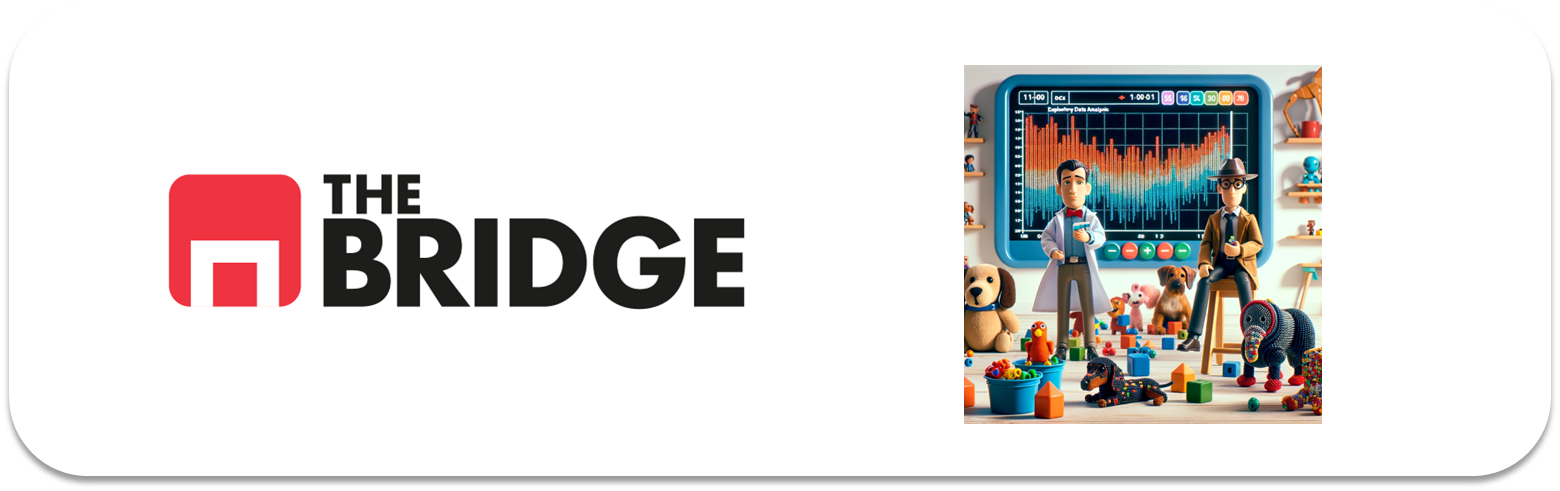

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [200]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_combined_graphs, \
    plot_grouped_boxplots, plot_grouped_histograms, grafico_dispersion_con_correlacion, bubble_plot

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [59]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [60]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [61]:
df_titanic["family_members"] = df_titanic[["parch","sibsp"]].sum(axis=1)  # AXIS 1 porque calcula la suma del eje de las filas y nos devuelve una serie que volcamos en una columna
df_titanic.drop(columns= ["sibsp","parch"], inplace=True)

df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
print(df_titanic["embark_town"].mode()) # la moda es Southampton
df_titanic.loc[df_titanic["embark_town"].isna(), "embark_town"] = "Southampton"

# comprobamos que ya no hay nulos en embark_town:
df_titanic.embark_town.value_counts(dropna=False)

0    Southampton
Name: embark_town, dtype: object


embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [ ]:
df_titanic.who.value_counts() # impuramos la media en función de la categoría mujer/hombre/niño (para que no haya tanta desviación sobre todo en el grupo de los niños)

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [ ]:
son_mujeres = df_titanic.who == "woman"
son_hombres = df_titanic.who == "man"
son_ninos = df_titanic.who == "child"

media_mujer = df_titanic.loc[son_mujeres, "age"].mean()
media_hombre = df_titanic.loc[son_hombres,"age"].mean()
media_nino = df_titanic.loc[son_ninos, "age"].mean()

sin_edad = df_titanic.age.isna()

df_titanic.loc[son_mujeres & sin_edad, "age"] = media_mujer
df_titanic.loc[son_hombres & sin_edad, "age"] = media_hombre
df_titanic.loc[son_ninos & sin_edad, "age"] = media_nino

sin_edad.value_counts() # comprobamos que ya no hay nulos

age
False    891
Name: count, dtype: int64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de qué clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de qué ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajeros que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

    1.6.1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?
    
    OBSERVACIONES Y CONCLUSIONES TRAS EL ANÁLISIS:

- Observamos que, en valores absolutos, sobrevivieron más mujeres (un total de 205), seguidas por hombres (88) y niños (49) en último lugar.

- Sin embargo, en términos relativos las mujeres siguen en cabeza con un 76% de supervivencia seguidas por los niños (59%) y un escaso 16% de los hombres. La diferencia en los resultados se debe a que la mayoría de los pasajeros eran hombres y que además viajaban muy pocos niños. 

- A simple vista se puede observar una clara correlación entre el género y el factor supervivencia. Para corroborar esta hipótesis, hemos aplicado el test de Chi-Cuadrado (pues estamos comparando dos variables categóricas). El p-value resultante (2.2227620817798914e-62) se situa muy por debajo del umbral del 0.05, lo cual refuerza nuestra hipótesis: las variables están relacionadas entre sí, la supervivencia depende estrechamente del género/condición del pasajero.

- No hay diferencia significativa en términos relativos en los resultados de mortalidad en función de la condición adulto / niño. **Una persona se considera de edad adulta a partir de los 16 años.

**Concluimos que el género es un factor determinante para la supervivencia (incluyendo en esta distinción la condición de niño).**

Análisis detallado a continuación:


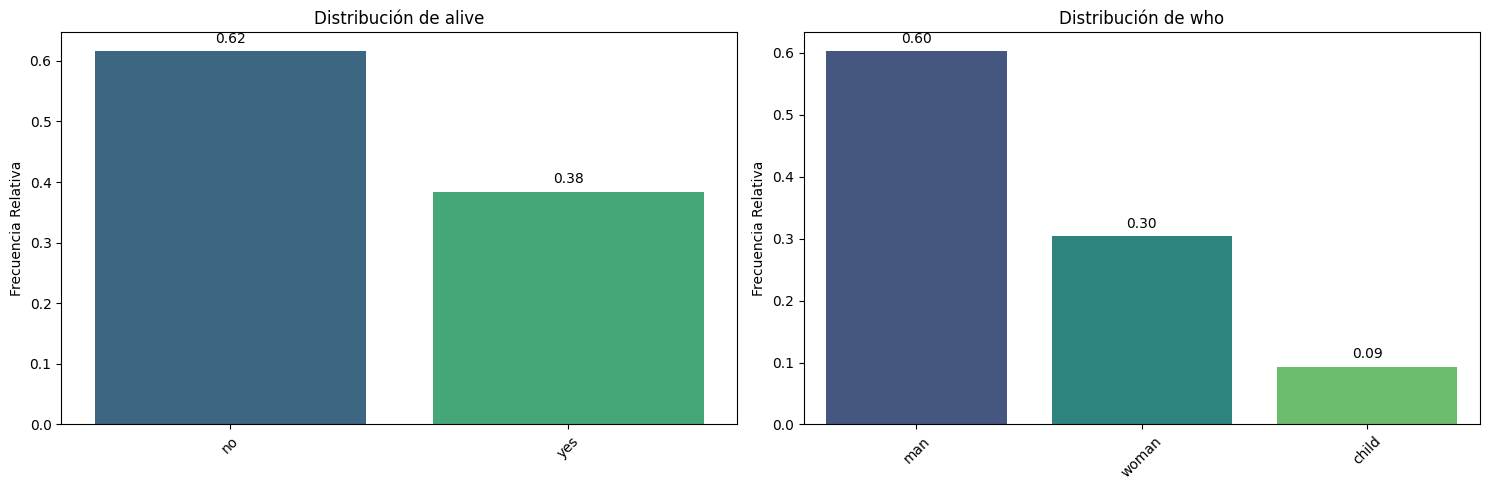

In [119]:
# 'alive' será nuestra columna directora. Para contestar a la primera cuestión, trabajaremos también con la columna 'who'.
# pintamos la distribución de ambas de forma separada:

pinta_distribucion_categoricas(df_titanic,["alive","who"],mostrar_valores=True, relativa=True)

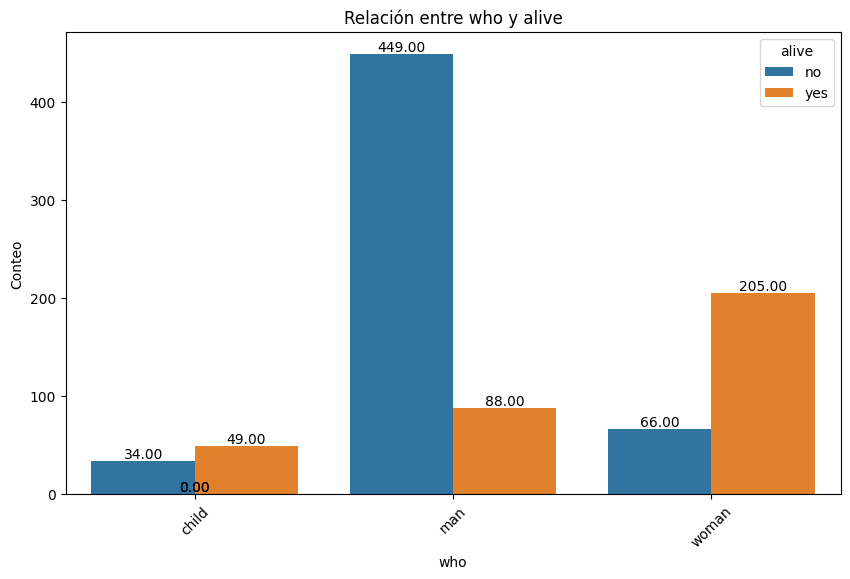

In [ ]:
# seguimos con el análisis bivariante, veamos primero los datos en términos absolutos:

plot_categorical_relationship_fin(df_titanic,"who","alive",show_values=True)

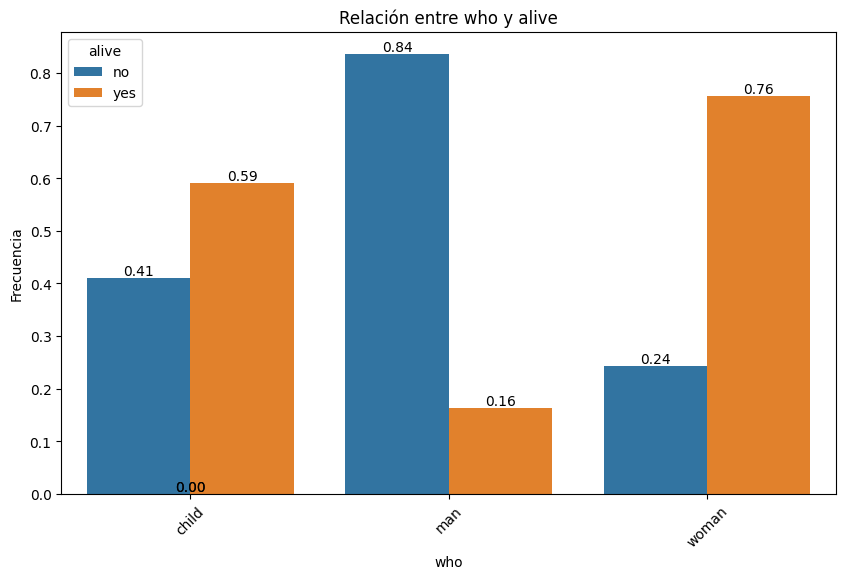

In [121]:
# y ahora en términos relativos:
plot_categorical_relationship_fin(df_titanic,"who","alive",relative_freq=True,show_values=True)

    OBSERVACIÓN DE LOS DIAGRAMAS:
- Observamos que, en valores absolutos, sobrevivieron más mujeres (un total de 205), seguidas por hombres (88) y niños (49) en último lugar.
- Sin embargo, en términos relativos las mujeres siguen en cabeza con un 76% de supervivencia seguidas por los niños (59%) y un escaso 16% de los hombres. La diferencia en los resUltados se debe a que la mayoría de los pasajeros eran hombres y que además viajaban muy pocos niños. 
- A simple vista se puede observar una clara correlación entre el género y el factor supervivencia. Para corroborar nuestra hipótesis, aplicaremos el test de de Chi-Cuadrado (pues estamos comparando dos variables categóricas)

In [ ]:
# Para aplicar el Test de Chi-2, primero debemos obtener la tabla de contingencia:

contingency = pd.crosstab(df_titanic["who"],df_titanic["alive"])
contingency # el resultado es un df que nos muestra en términos absolutos el núm de supervivientes / fallecidos en función de su condición de hombre/mujer/niño.

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [ ]:
from scipy.stats import chi2_contingency     # importamos el test del módulo Scipy

chi2, p, dof, expected = chi2_contingency(contingency)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# El p-value se situa muy por debajo del umbral del 0.05, lo cual refuerza nuestra hipótesis: 
# las variables están relacionadas entre sí, la supervivencia depende del género/condición del pasajero

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


In [ ]:
# Ahora nos interesa comparar la tasa de supervivencia entre adultos y niños. 
# Veamos cómo se distribuyen los valores de edad , para ello recuperamos las máscaras booleanas del ejercicio anterior 

df_titanic.loc[son_mujeres, "age"].value_counts() # al ejecutar esto, encontramos valores de edad de 16 y 17 años, por ejemplo
df_titanic.loc[son_ninos, "age"].value_counts() # la edad de los niños asciende hasta los 15 años.

# En el dataset se considera 'adulto' a una persona de 16 años o más, en vez de tener en cuenta la mayoría de edad.  

age
2.00     10
4.00     10
9.00      8
1.00      7
14.00     6
3.00      6
15.00     5
8.00      4
11.00     4
5.00      4
7.00      3
6.00      3
0.83      2
0.75      2
10.00     2
13.00     2
14.50     1
12.00     1
0.92      1
0.67      1
0.42      1
Name: count, dtype: int64

In [144]:
son_adultos = df_titanic.who != son_ninos   # creamos una nueva máscara para filtrar a los adultos 

# Obtenemos dos subdatasets para compararlos con nuestra variable directora 'alive'
df_titanic_adultos = df_titanic[son_adultos]
df_titanic_ninos = df_titanic[son_ninos]

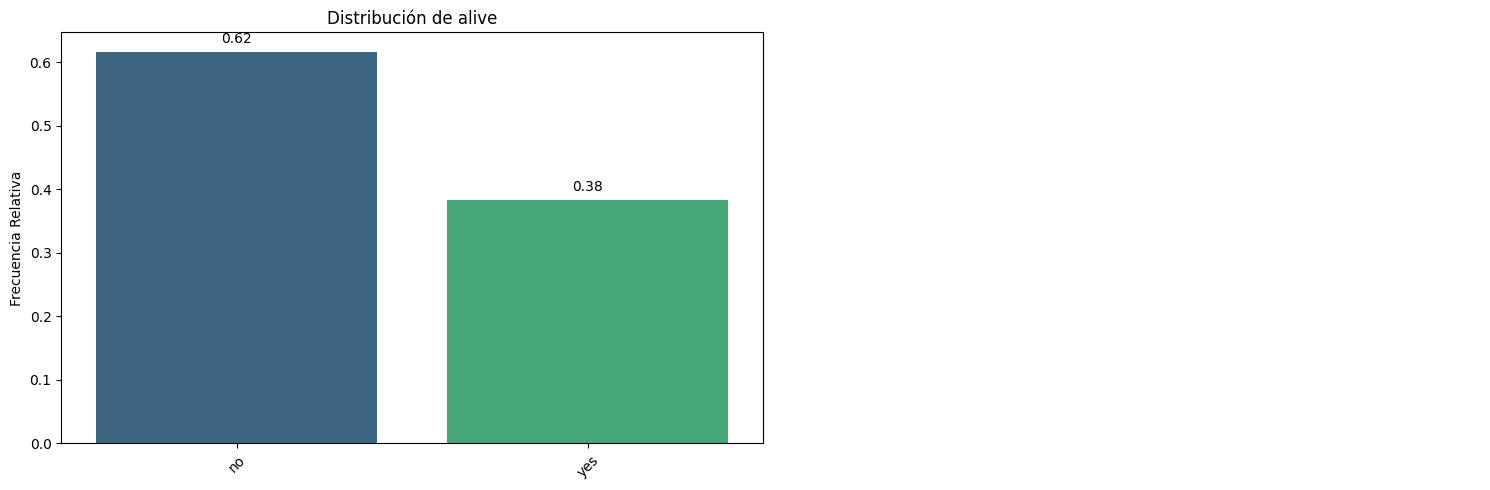

In [ ]:
# vemos la distribución de valores por separado de cada subdataset, es muy parecida para ambos (entre los adultos la mortalidad es ligeramente superior)

pinta_distribucion_categoricas(df_titanic_adultos,["alive"],relativa=True,mostrar_valores=True)

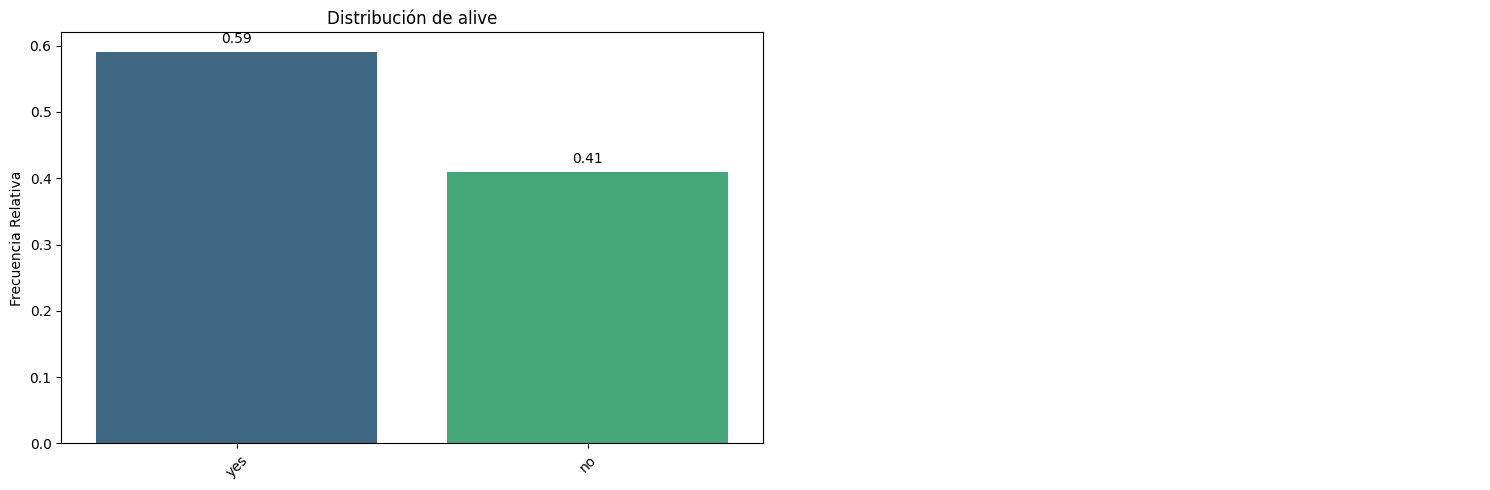

In [147]:
pinta_distribucion_categoricas(df_titanic_ninos,["alive"],relativa=True,mostrar_valores=True)

    OBSERVACIONES:
- No hay diferencia significativa en términos relativos en los resultados de mortalidad en función de la condición adulto / niño. Una persona se considera de edad adulta a partir de los 16 años.
- El factor determinante es el género (también podemos incluir en esta distinción la condición de niño)



---

    1.6.2. En términos absolutos, ¿de qué clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

    OBSERVACIONES Y CONCLUSIONES TRAS EL ANÁLISIS:

- Los pasajeros de primera clase encabezan el ranking de supervivientes tanto en términos absolutos (136 personas) como relativos (63%). Además, es la única clase en la que el número de supervivientes supera al de fallecidos.
- Existe una evidente relación entre la clase del pasajero y su probabilidad de supervivencia (corroborada con el test de Chi-2). Los pasajeros de segunda clase presentan datos bastante equilibrados (53% fallecidos frente a 47% supervivientes); sin embargo, los datos de los pasajeros de tercera evidencian la brecha de clases, ya que presentan una tasa de mortalidad del 76% de los pasajeros. Cabe recordar que la mayoría de pasajeros viajaban en tercera, por lo que este porcentaje representa una cifra muy elevada de fallecidos (372 personas).

**Concluimos que la clase en la que viajaba el pasajero es un factor determinante de su probabilidad de sobrevivir a la tragedia.**

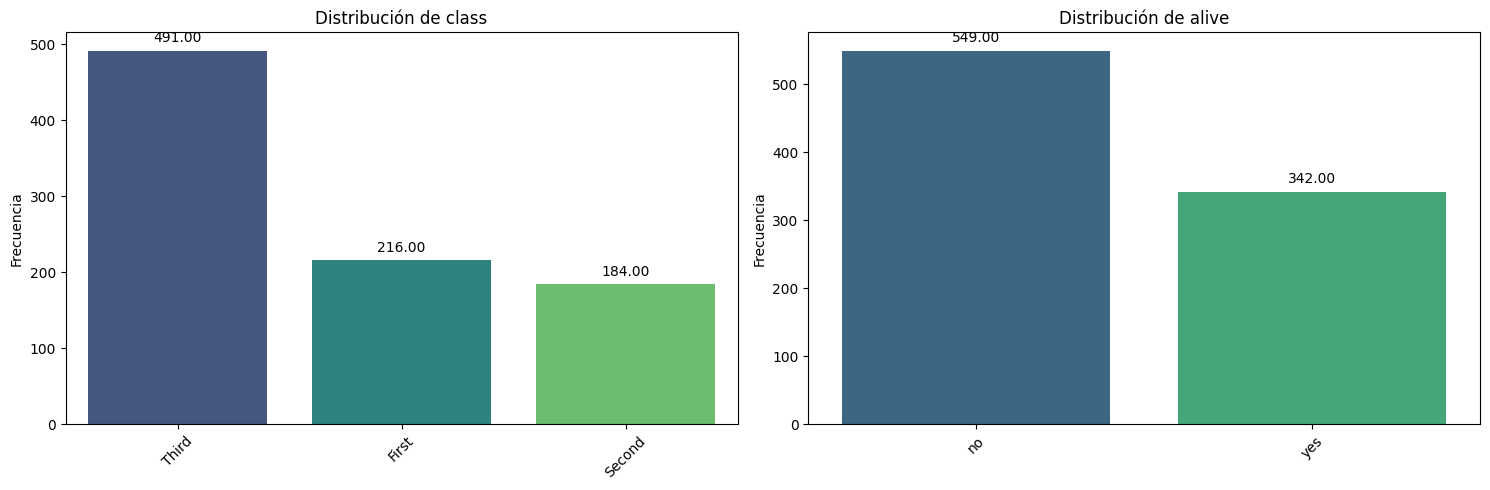

In [154]:
# Para la segunda cuestión, trabajaremos con la columna 'class' y nuestra directora 'alive'. Pintamos la distribución de valores por separado:
pinta_distribucion_categoricas(df_titanic,["class", "alive"],mostrar_valores=True)

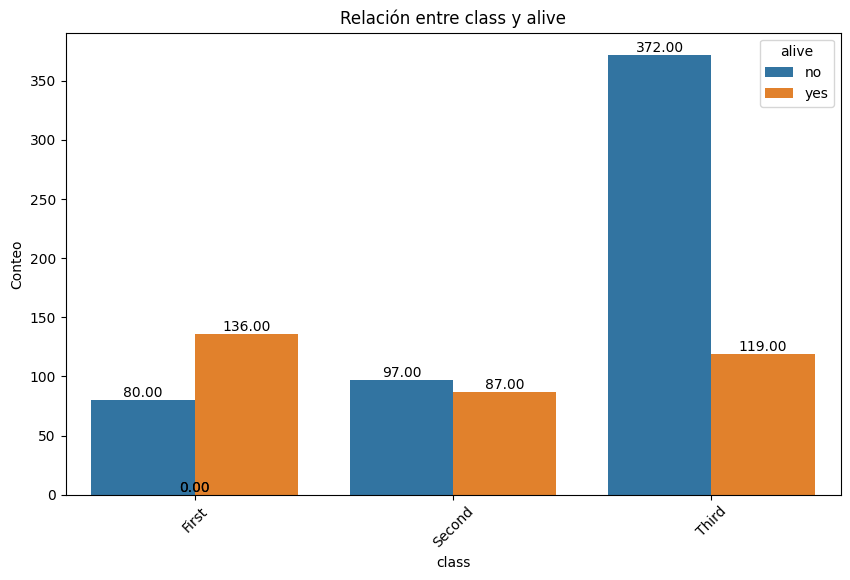

In [150]:
# pintamos su relación en términos absolutos:

plot_categorical_relationship_fin(df_titanic,"class","alive",show_values=True)

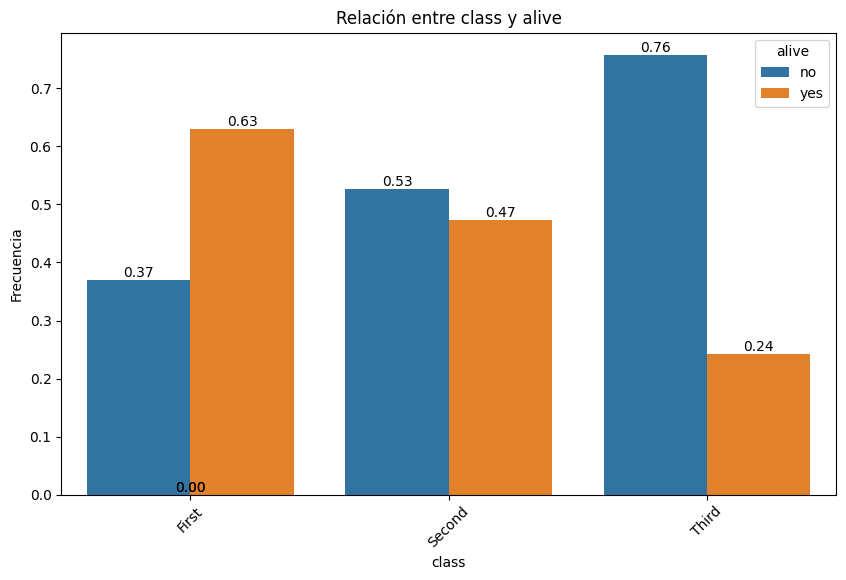

In [151]:
# y ahora en frecuencia relativa:

plot_categorical_relationship_fin(df_titanic,"class","alive",show_values=True,relative_freq=True)

In [152]:
# a simple vista se observa una fuerte relación entre la clase del pasajero y su probabilidad de supervivencia, aún así lo corroboramos aplicando el test de Chi-2:


contingency = pd.crosstab(df_titanic["class"],df_titanic["alive"])
contingency # el resultado es un df que nos muestra en términos absolutos el núm de supervivientes / fallecidos en función de la clase en la que viajaban.

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [ ]:
from scipy.stats import chi2_contingency     # importamos el test del módulo Scipy

chi2, p, dof, expected = chi2_contingency(contingency)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# El p-value se situa muy por debajo del umbral del 0.05, lo cual refuerza nuestra hipótesis: 
# las variables están relacionadas entre sí, la supervivencia depende fuertemente de la clase a la que pertenecía

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


---


    1.6.3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de qué ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

- En términos absolutos, sobrevivieron más personas que habían embarcado en Southampton (219 en total), lo cual no es sorprendente porque el 73% del total de pasajeros del Titanic embarcó en esta ciudad.

- En términos relativos, los pasajeros que embarcaron en Cherbourg están en cabeza con un 55% de supervivientes. Como curiosidad, es la única ciudad que presenta mayor índice de supervivientes que de fallecidos (tal y como pasaba con el análisis de primera clase). Estarán relacionados? Sería interesante comparar estas dos variables entre sí.

- También cabe destacar que no existe una diferencia significativa entre haber embarcado en Southampton o en Queenstown (en términos relativos).

- Tras aplicar el test de Chi-2 podemos afirmar que estadísticamente sí que hay una relación significativa entre el puerto de embarque y la tasa de mortalidad. Aún así, el p-value (2.3008626481449577e-06) es mayor que el obtenido en los análisis en función de género y clase.

**Concluimos que el puerto de embarque es un factor condicionante del índice de mortalidad aunque no el más determinante.**

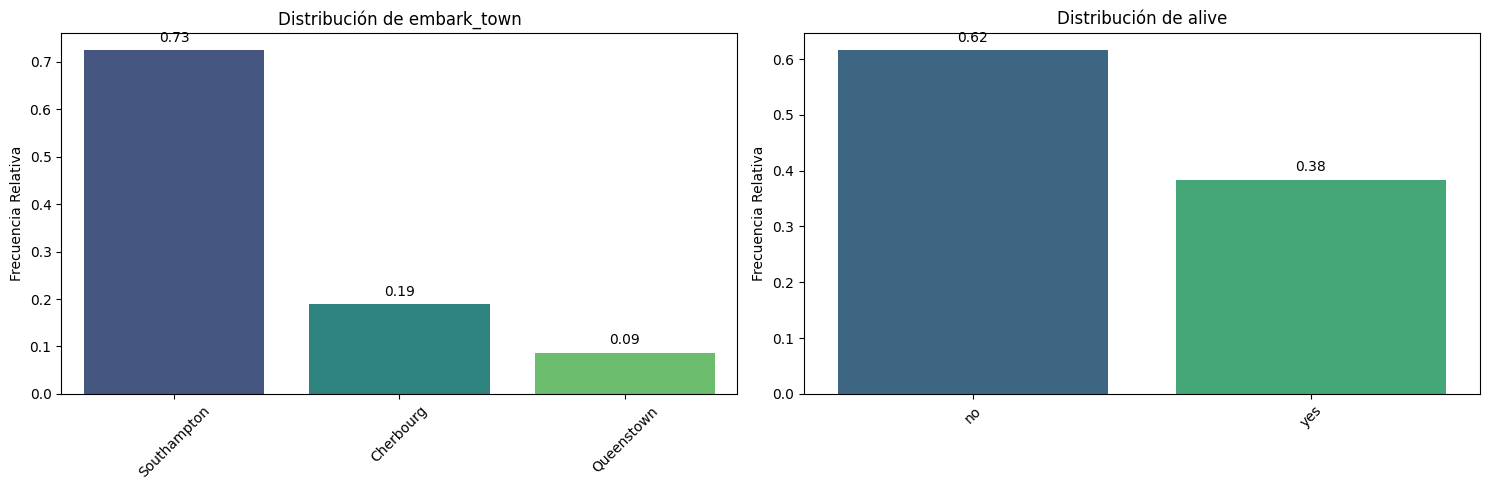

In [ ]:
# Trabajaremos con las variables 'embark_town' y 'alive' (nuestra directora).
# Como siempre, pintamos la distribución de valores por separado:

pinta_distribucion_categoricas(df_titanic,["embark_town","alive"],mostrar_valores=True, relativa=True)

# Tres cuartas partes de los pasajeros embarcaron en Southampton, a priori podemos pensar que también es el puerto donde embarcaron la mayoría de fallecidos. 
# Lo vamos a comprobar.

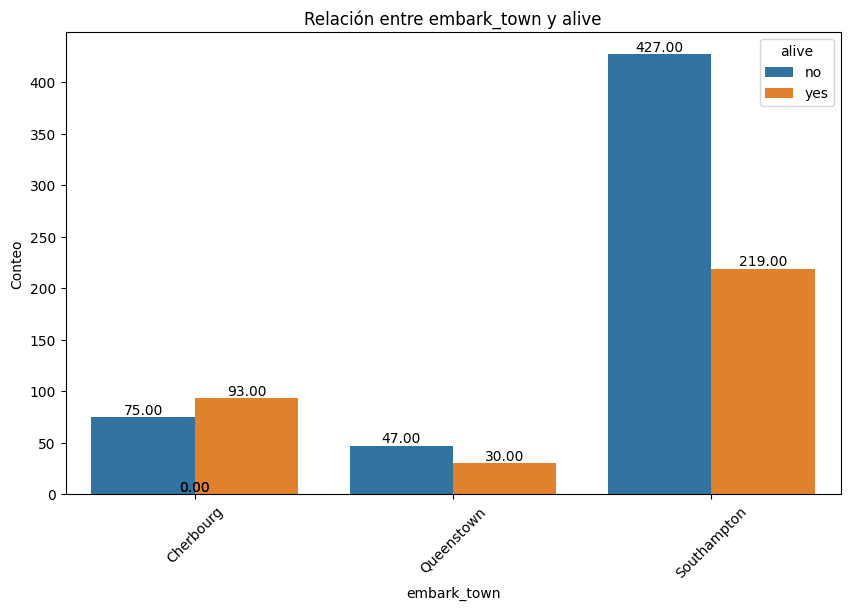

In [ ]:
# Datos de frecuencia absoluta:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive",show_values=True)

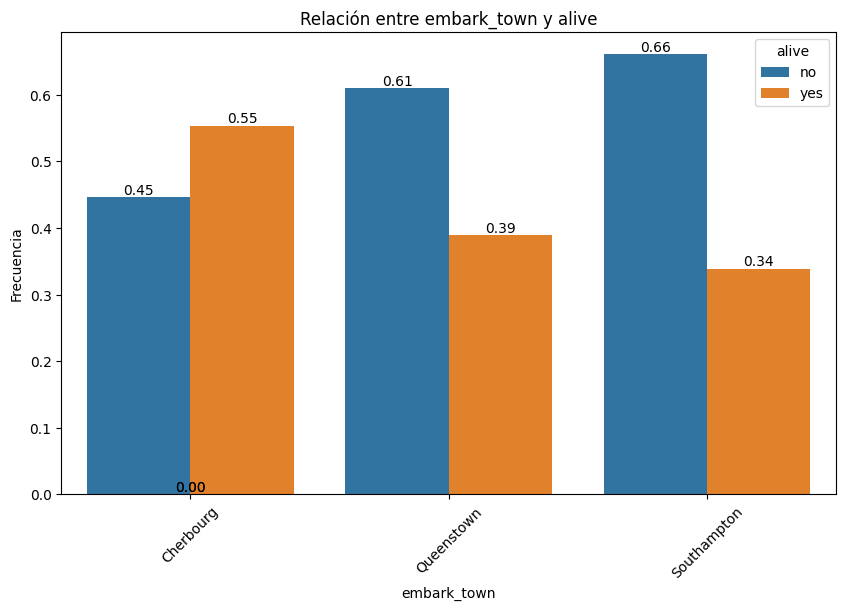

In [160]:
# Datos de frecuencia relativa:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive",relative_freq=True,show_values=True)

In [161]:
# Se puede observar que no hay una diferencia significativa entre los supervivientes embarcados en Southampton o en Queenstown, pero sí entre los que lo hicieron en Cherbourg.
# Hagamos el test de Chi-2 para salir de dudas:

contingency = pd.crosstab(df_titanic["embark_town"],df_titanic["alive"])
contingency # el resultado es un df que nos muestra en términos absolutos el núm de supervivientes / fallecidos en función de la ciudad de la que procedían/en la que embarcaron.


alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [ ]:
from scipy.stats import chi2_contingency     # importamos el test del módulo Scipy

chi2, p, dof, expected = chi2_contingency(contingency)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# El p-value se mantiene por debajo del umbral del 0.05, lo corrobora que las variables están relacionadas entre sí.

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


---

    1.6.4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

    OBSERVACIONES Y CONCLUSIONES TRAS EL ANÁLISIS:

- Hemos realizado el análisis descartando el outlier más alejado (precio del billete por encima de 500).

- Hemos descartado el resultado del análisis de tendencia central, pues hay mucha dispersión en los datos. 

- Del diagrama de cajas, observamos que la tarifa que pagaron la mayoría de fallecidos se concentra en un rango muy bajo (poco más de 0 hasta 25). Aún así hay muchos outliers, que llegan a superar los 250.

- Del histograma y KDE, vemos que la tarifa que pagaron los supervivientes se concentra entre 15-50 (siendo 15 una cifra superior al percentil 50% del conjunto de datos de los fallecidos). También encontramos outliers, pero en menor medida, y también llegan a superar los 250.

- El precio del pasaje está relacionado con la supervivencia (lógicamente, ya que el precio fluctúa en función de la clase y ya vimos cómo interactuaba con la mortalidad)

- Hipótesis corroborada por la prueba U de MANN-WHITNEY, obtenemos un p-value de 4.553477179250237e-22 (muy similar al del análisis con la variable clase).

**Concluimos que la supervivencia depende estrechamente del precio pagado por el billete.**

(2,)


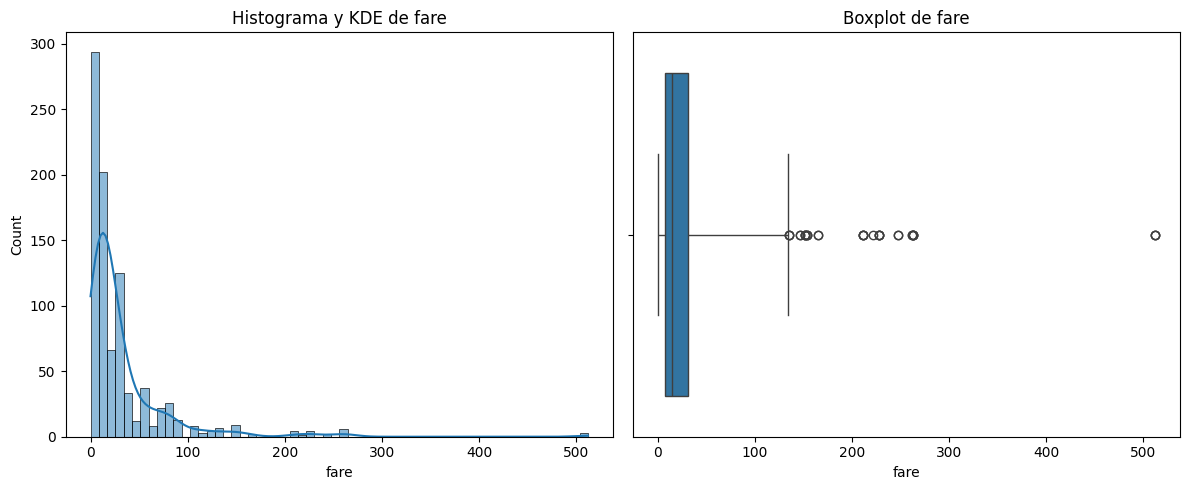

In [ ]:
# trabajaremos con 'fare' y 'alive'
# distribución de valores por separado:

plot_combined_graphs(df_titanic,["fare"],bins=60, whisker_width=4.5)

# Observamos que la mayoría de los pasajes se concentran en un rango de precios de entre 0-20 (recordemos que la mayoría son de tercera clase).
# Según el KDE, podemos establecer el umbral de corte un poco antes de 300 (260-280aprox); 
# Sin embargo, el diagrama de cajas lo coloca sobre 130; a partir de ahí tenemos una serie outliers concentrados que llegan a rozar 300 y uno mucho más alejado que supera los 500.
# Teniendo esto en cuenta, es sensato trabajar con las tarifas que alcanzan los 280 y que tratemos el outlier de 500 de forma independiente.

# Observamos de nuevo la concentración de fallecidos en el rango de tarifas más económicas (sobre todo de 0 a 10, lo que indica que hay pasajeros que no pagaron por la travesía)
# A partir de los 50 el índice de supervivencia es claramente superior. La mortalidad llega a ser imperceptible a medida que aumenta el precio del pasaje.

In [ ]:
# Echemos un vistazo muy rápido al pasajero que pagó +500:
# Obtenemos 3 resultados, observamos que estas 3 personas obviamente viajaban en primera y que, curiosamente, embarcaron en Cherbourg. Todos sobrevivieron a la tragedia.
df_titanic.loc[df_titanic.fare > 500]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


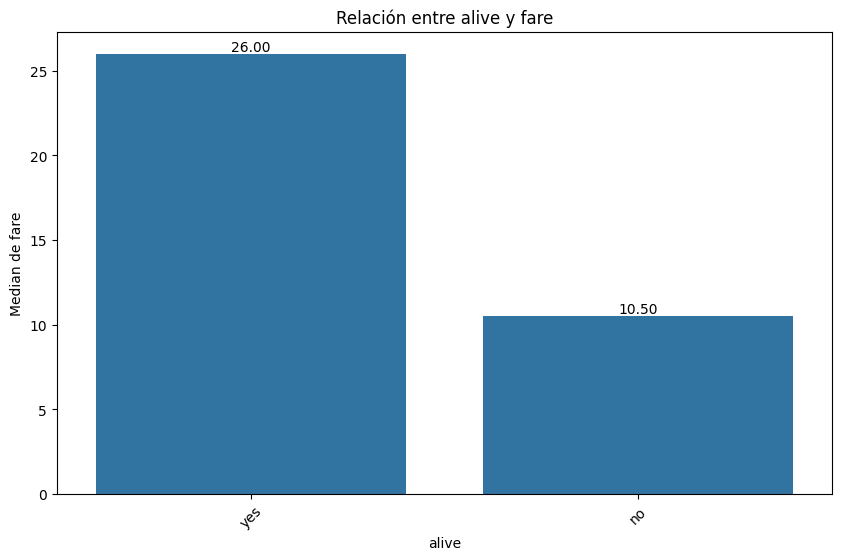

In [ ]:
# Excluimos a estos pasajeros para nuestro análisis:
df_sin_500 = df_titanic.loc[df_titanic.fare < 500]

# y ahora sí, veamos como interactúan las variables entre sí:

# mediana:
plot_categorical_numerical_relationship(df_sin_500,"alive","fare",show_values=True,measure="median")

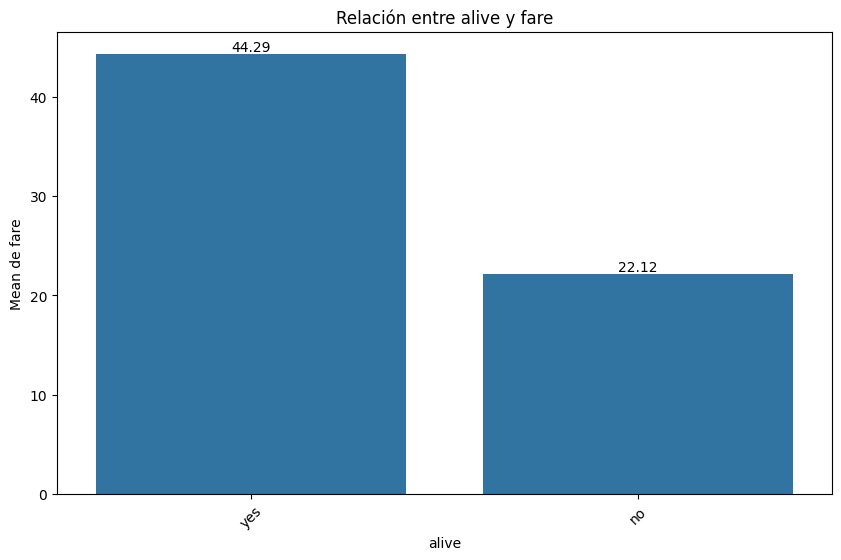

In [186]:
# vs. media:
plot_categorical_numerical_relationship(df_sin_500,"alive","fare",show_values=True,measure="mean")

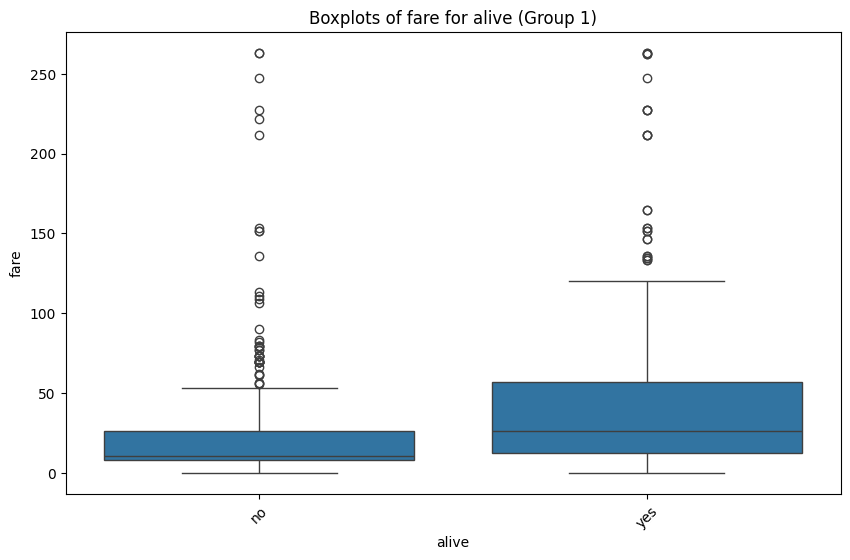

In [ ]:
# La tendencia central nos devuelve datos muy dispares, los descartamos.
# Buscamos resultados más representativos mediante el diagrama de cajas, los histogramas y la estimación de la densidad de Kernel:

plot_grouped_boxplots(df_sin_500,"alive","fare")
# Aquí observamos que la tarifa que pagaron la mayoría de fallecidos se concentra en un rango muy bajo (poco más de 0 hasta 25). 
# Aún así hay muchos outliers, que llegan a superar los 250.

# La tarifa que pagaron los supervivientes se concentra entre 15-50 (siendo 15 una cifra superior al percentil 50% del conjunto de datos de los fallecidos). 
# También encontramos outliers, pero en menos medida, y también llegan a superar los 250.

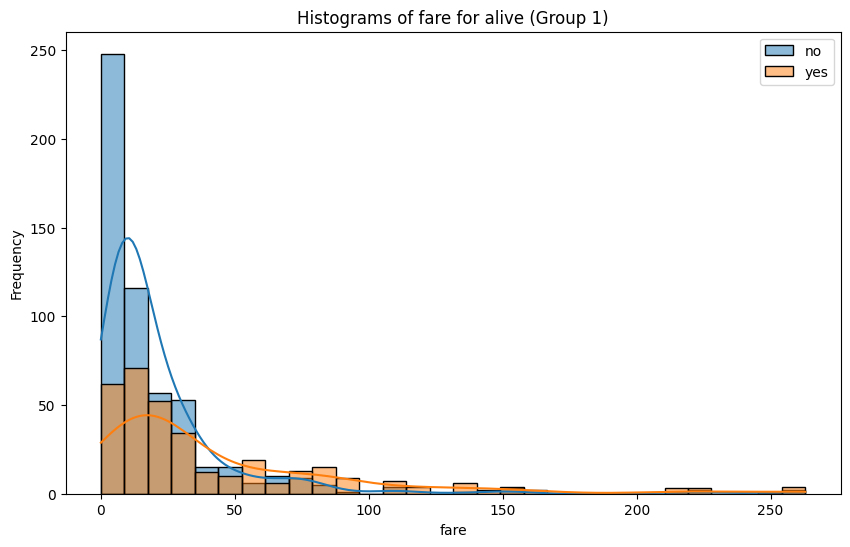

In [ ]:
plot_grouped_histograms(df_sin_500,"alive","fare",group_size=2,bins=30)

# Observamos de nuevo la concentración de fallecidos en el rango de tarifas más económicas (sobre todo de 0 a 10, lo que indica que hay pasajeros que no pagaron por la travesía)
# A partir de los 50 el índice de supervivencia es claramente superior. La mortalidad llega a ser imperceptible a medida que aumenta el precio del pasaje.

In [ ]:
# A priori el precio del pasaje está relacionado con la supervivencia (lógicamente, ya que el precio fluctúa en función de la clase y ya vimos cómo interactuaba con la mortalidad)

# Corroboremos esta hipótesis con la prueba U de MANN-WHITNEY, aplicable a variables son combinadas (una categórica binaria y una numérica) 

# Nos traemos el test del módulo scipy:
from scipy.stats import mannwhitneyu

# agrupamos los datos según la variable categórica:
grupo_a = df_titanic.loc[df_titanic.alive == "yes", "fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

# El valor-p apoya a nuestra hipótesis: El precio del pasaje determina la probabilidad de supervivencia.

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


---

    1.6.5. Existen pasajeros que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

- Podemos deducir que los pasajeros que no pagaron por su billete son miembros de la tripulación, pues son todos hombres en edad de trabajar (la mayoría en la treintena) que subieron a bordo en el puerto de origen (Southampton). Están distribuídos entre las tres clases, cuya repartición dependería del cargo de cada uno.
- Las tres personas (2 hombres y 1 mujer) que compraron el billete más caro viajaban obviamente en primera clase y, curiosamente, embarcaron en Cherbourg. Todos sobrevivieron a la tragedia.


In [ ]:
print(f"Un total de {len(df_titanic[df_titanic.fare == 0])} no pagaron por viajar en el Titanic.")

df_titanic[df_titanic.fare == 0]

# ¿Qué sabemos?
# Todos viajaban solos, todos embarcaron en Southampton, todos eran hombres adultos con edades similares (la mayoría en la treintena). 
# Están repartidos por clases y sólo uno de ellos sobrevivió.
# Podemos deducir que se trata de la tripulación, pues son hombres en edad de trabajar que subieron a bordo en el puerto de origen. 
# La repartición por clases seguramente depende del cargo de cada miembro de la tripulación.

Un total de 15 no pagaron por viajar en el Titanic.


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [ ]:
# Nos traemos de nuevo el análisis que ya hemos hecho en el apartado anterior sobre el pasajero que pagó +500:
# Obtenemos 3 resultados, observamos que estas 3 personas (2 hombres y 1 mujer) obviamente viajaban en primera y que, curiosamente, embarcaron en Cherbourg. Todos sobrevivieron a la tragedia.
df_titanic.loc[df_titanic.fare > 500]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


---

1.6.6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

Respuesta Southampton:


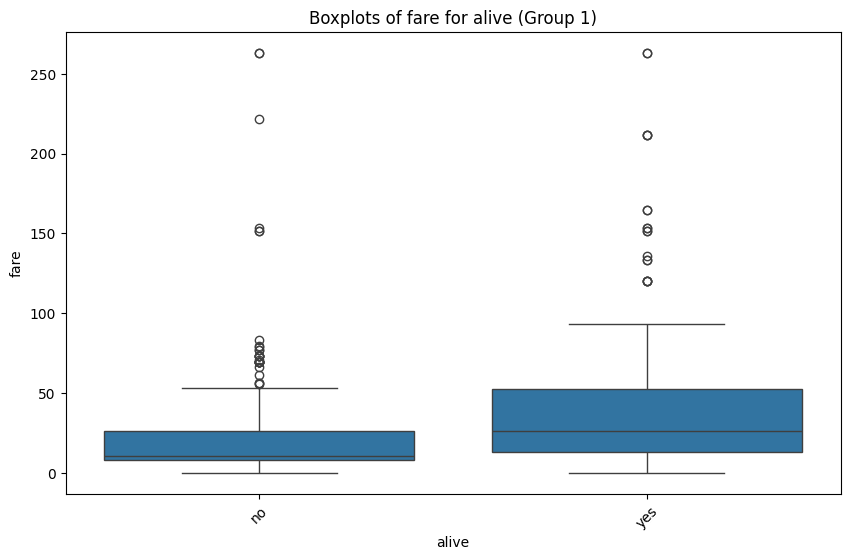

Respuesta Cherbourg:


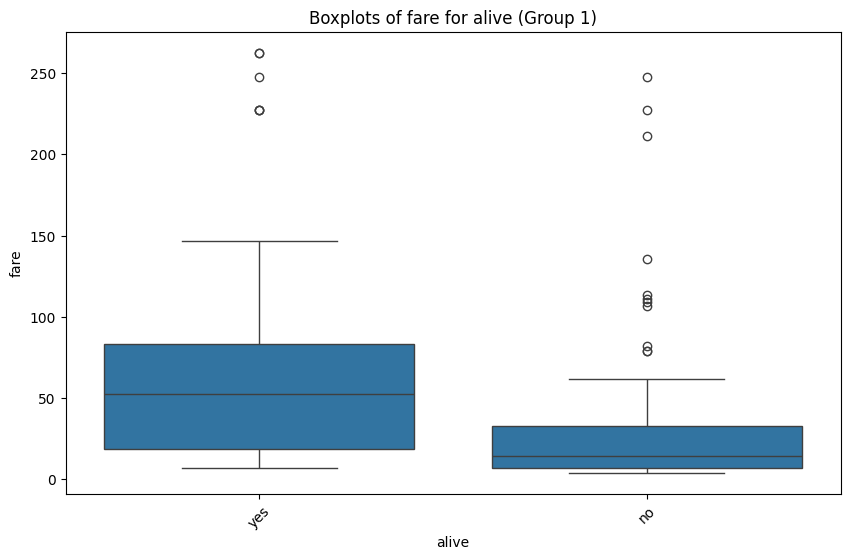

Respuesta Queenstown:


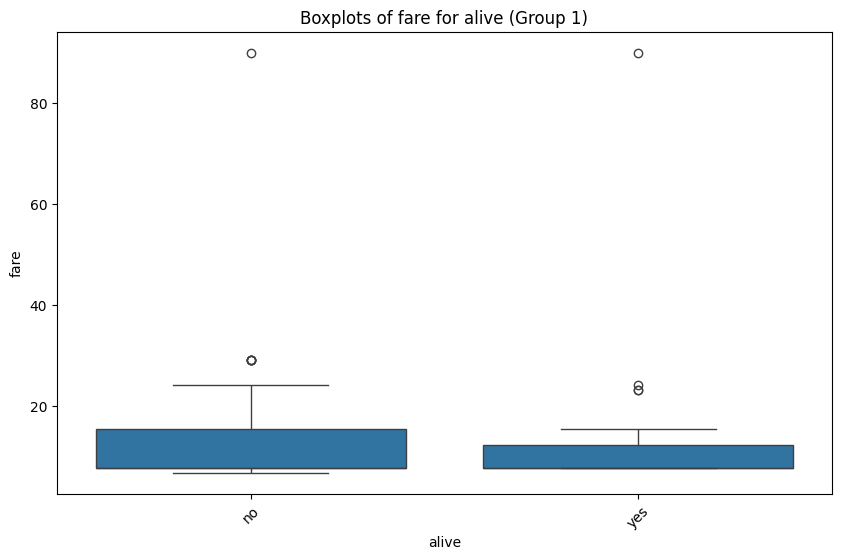

In [ ]:
# Ya estamos familiarizados con la distribución individual de cada variable (lo hemos hecho varias veces a lo largo del análisis), de modo que no lo volvemos a pintar.

# Tengo 2 categóricas y 1 numérica. Dividiremos el análisis en función del puerto de origen y utilizamos el df filtrado sin el outlier de los pasajeros que gastaron +500.
col_directora = "embark_town"
col_1 = "alive"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df_sin_500[col_directora].unique():
    diccionario_multivariante[valor] = df_sin_500.loc[df_sin_500[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_boxplots(df_datos,col_1,col_2)

    OBSERVACIONES:

El diagrama de cajas nos muestra una agrupación de datos similar en Southampton y Cherbourg: los fallecidos se conCentran entre quienes compraron los billetes de menor rango 
de precio, mientas que los supervivientes se agrupan en rangos ligeramente más altos. Destaca Cherbourg  con un rango de precios superior al de los otros dos puertos,por ejemplo: en el conjunto de los precios que pagaron los supervivientes (entre 20 y 80 frente a 15 y 50 en Southampton). El diagrama de Queenstown no es muy esclarecedor.

Respuesta Southampton:


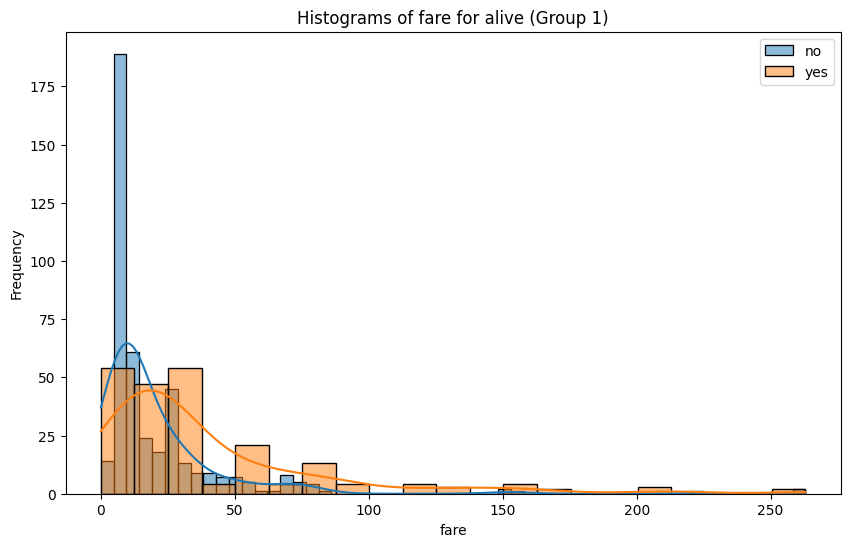

Respuesta Cherbourg:


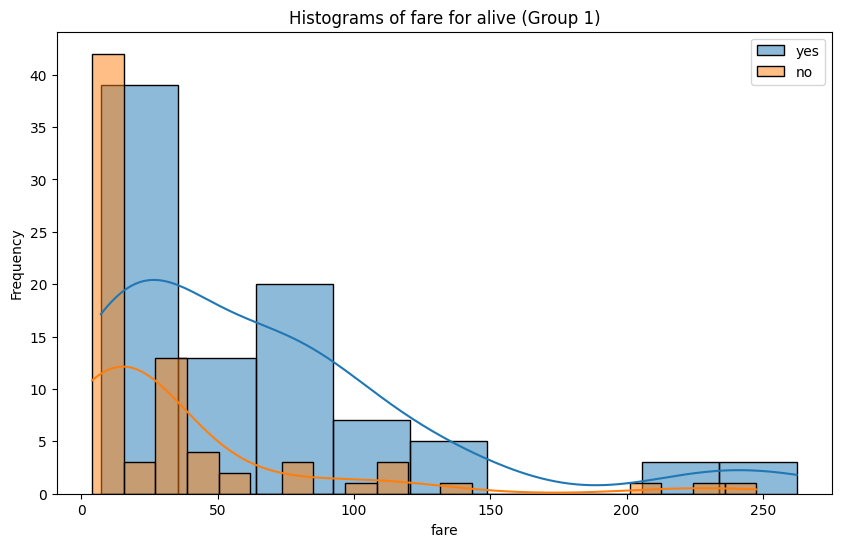

Respuesta Queenstown:


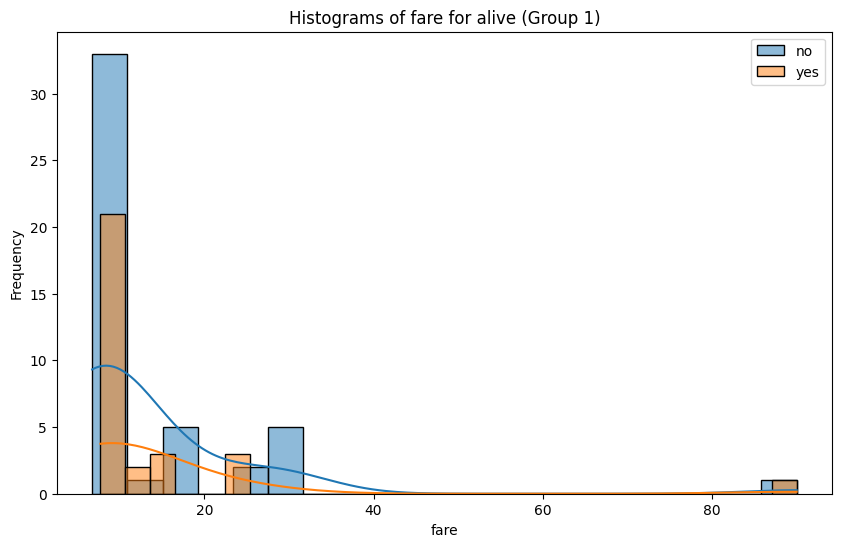

In [226]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df_datos,col_1,col_2,group_size=2)

    OBSERVACIONES:

- Southampton: Representa la mayoría de pasajeros a bordo. Los fallecidos se concentran en el rango más bajo de la tarifa (0-15), mientras que los supervivientes se distribuyen en rangos de precio más elevados. Estos últimos se concentran en un pico pronunciado (representando las tarifas de 0-40) y van descendiente paulatinamente a partir de ahí. 

- En cuanto a la distribución de fallecidos, observamos el mismo fenómeno en  Queenstown y Cherbourg pero de manera menos pronunciada que en Southampton (no se observa un pico destacable entre los pasajeros con el billete más barato, sobre todo en Cherbourg).

- Queenstown: Observamos mucha dispersión en el precio del billete aunque sí observamos que el precio máximo que pagó un pasajero por embarcar (80) es muy inferior respecto a los
otros dos puertos (que alcanzan los 250). Observamos también que el total de fallecidos es regularmente superior al de supervivientes, lo cual no ocurre en las otras dos ciudades a medida que los rangos de precios aumentan.

- Cherbourg: Observamos que, salvo en el rango de precios más bajo (0-15), el número de supervivientes siempre supera al de fallecidos. De media, los pasajeros que 
embarcaron en este puerto pagaron un precio más elevado por sus pasajes. Recordemos que los pasajeros que más se gastaron en sus billetes embarcaron aquí.

---

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

    OBSERVACIONES TRAS EL ANÁLISIS:
Podemos establecer que el rango con mayor concentración de superviviente es de entre 25 y 35. En términos relativos, los pasajeros de primera de este rango de edad son los que presentan mayor índice de superviviencia. En términos absolutos podemos afirmar que son los pasajeros de tercera de entre 30-35 años.

Respuesta no:


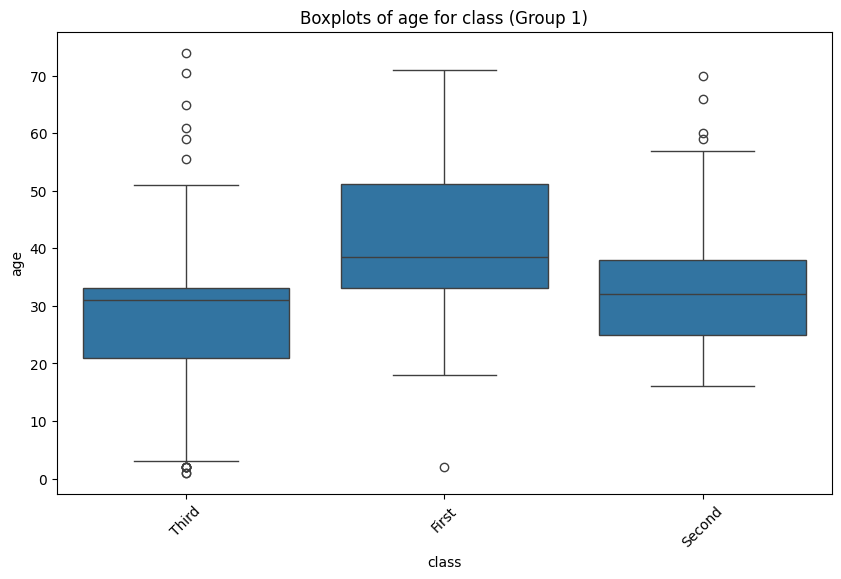

Respuesta yes:


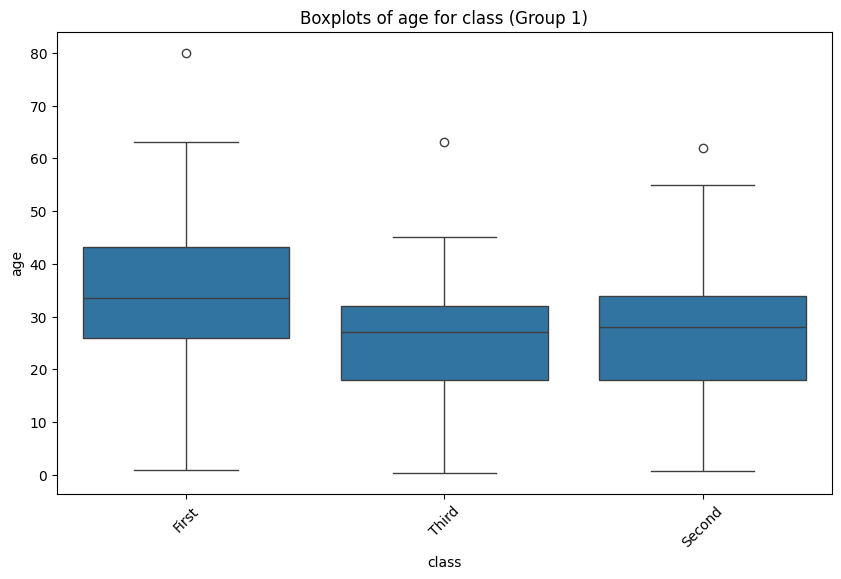

In [235]:
col_directora = "alive"
col_1 = "class"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_boxplots(df_datos,col_1,col_2)

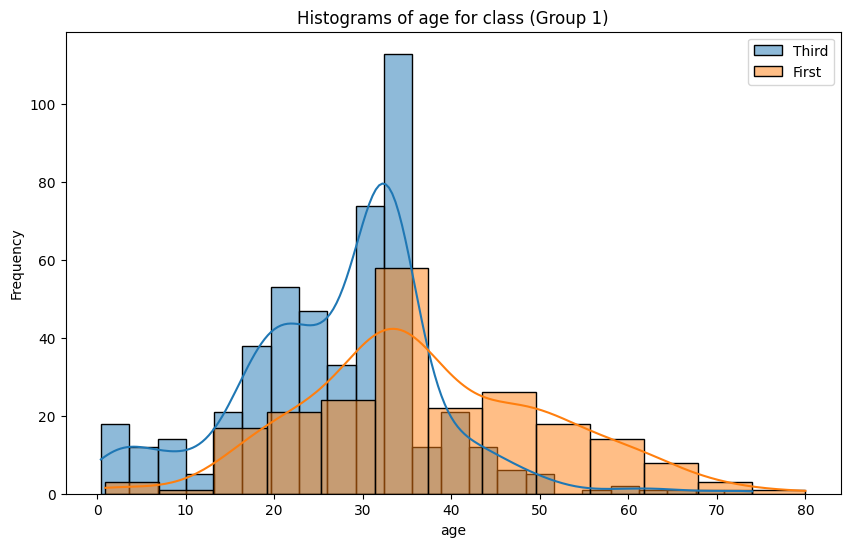

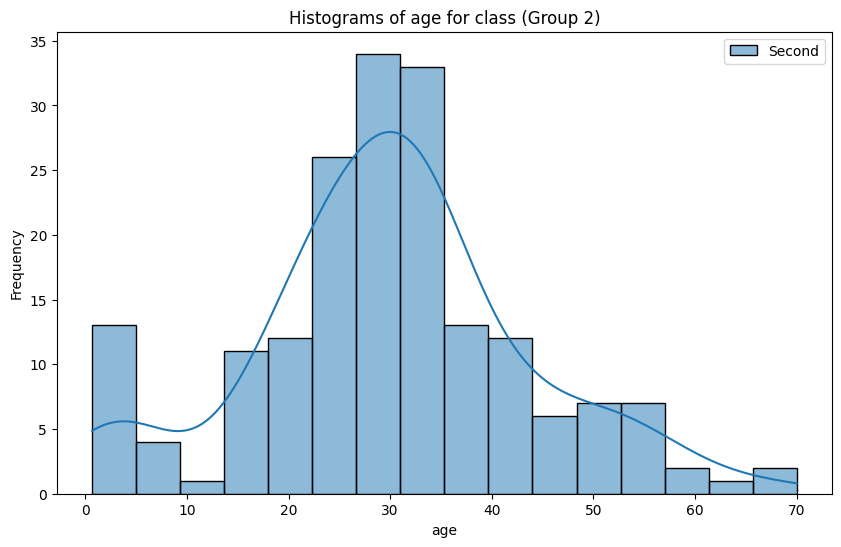

Respuesta no:


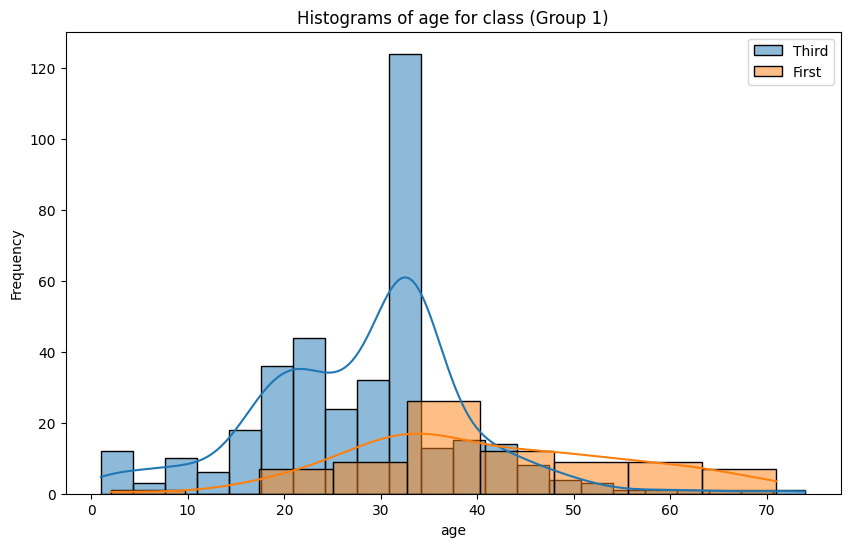

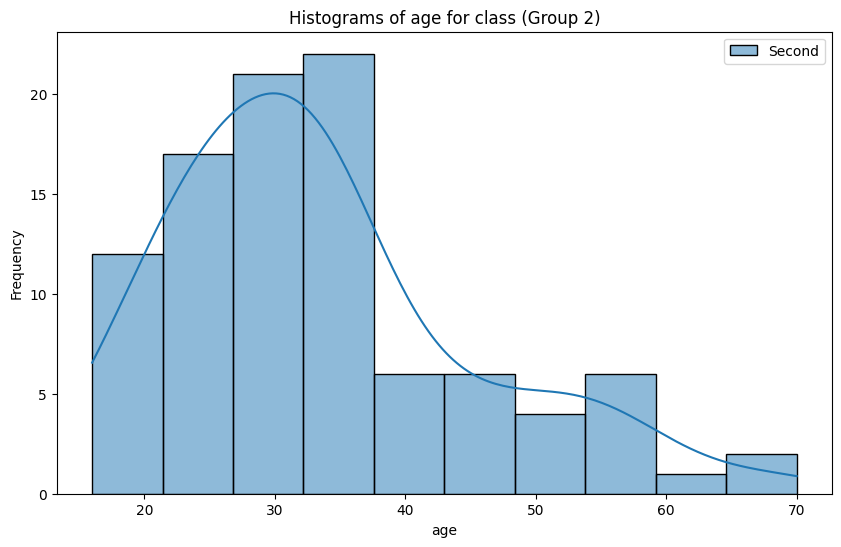

Respuesta yes:


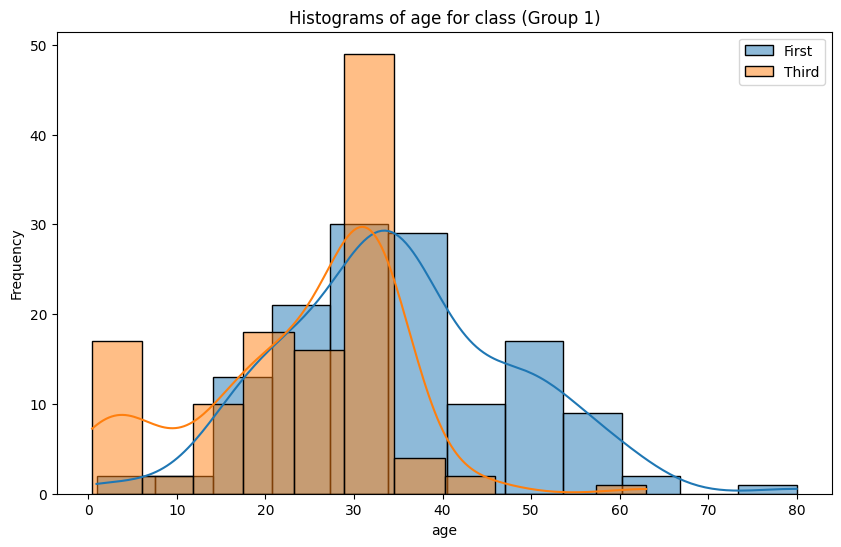

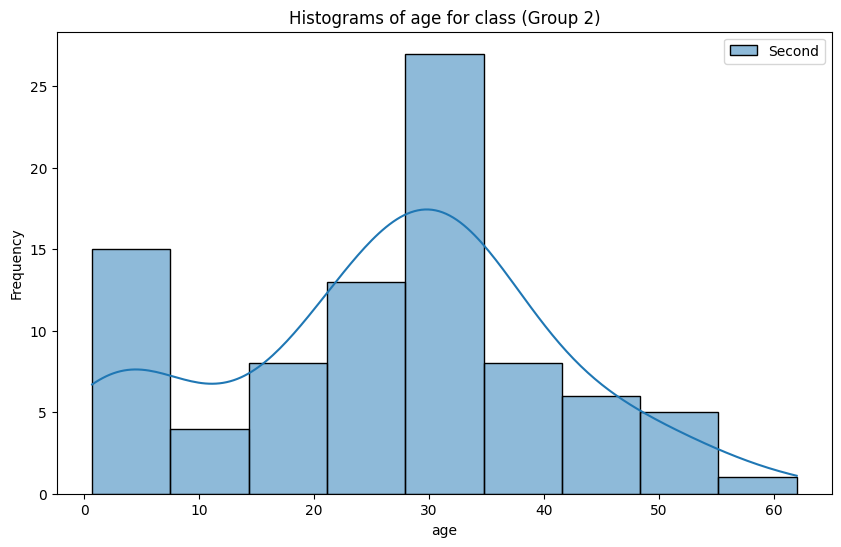

In [236]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df_datos,col_1,col_2,group_size=2)


8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

    OBSERVACIONES:
No existe una fuerte correlación entre el coste del billete y la edad en función de la supervicencia/fallecimiento. Se ve que la mayoria de fallecidos se encuentran en el rango de precios más bajos del coste del billete más allá de su rango de edad. En cuanto a los supervivientes, observamos mayor distribución de valores aunque la edad sigue siendo algo secundario. Lo que manda es el precio pagado por el billete, es decir, la clase a la que pertenece el pasajero.

In [239]:
col_directora = "alive"
col_1 = "age"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df_sin_500[col_directora].unique():
    diccionario_multivariante[valor] = df_sin_500.loc[df_sin_500[col_directora] == valor,[col_2,col_1]]

Respuesta no:


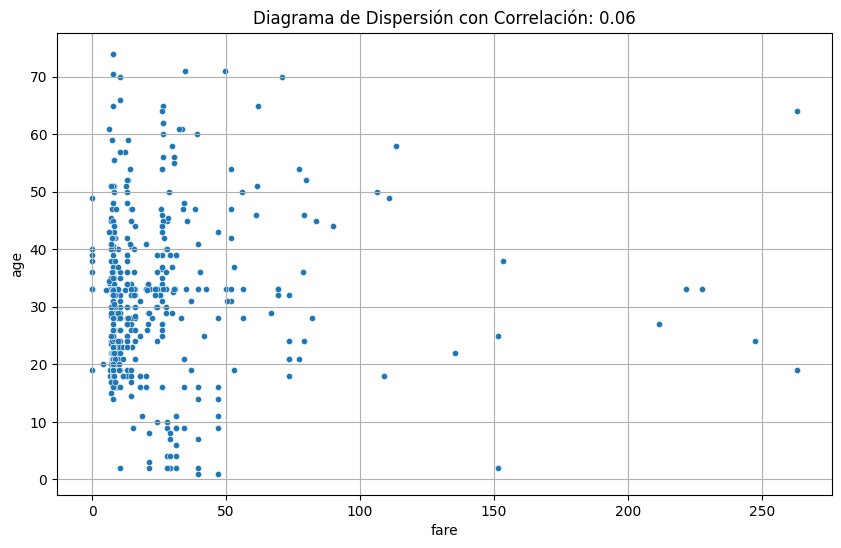

Respuesta yes:


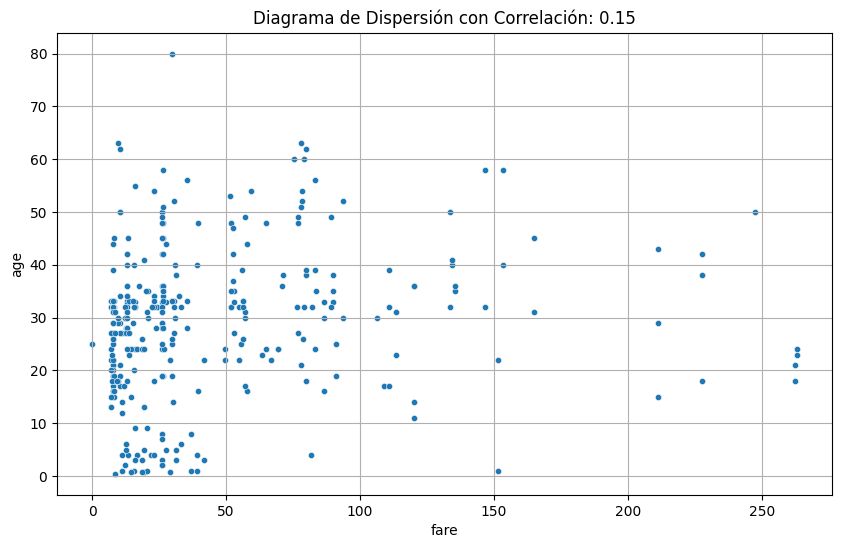

In [240]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

    OBSERVACIONES:

Teniendo en cuenta que Tabarair es la compañía con mayor número de vuelos, podemos considerar preocupantes sus cifras de ingresos, pues son las más bajas con respecto al resto de compañías. Además, observamos que su mayor pico de ingresos se concentra en el rango de precio de vuelos más bajo. Deberíamos fijarnos en la estrategia de Airnair, pues está en tercer puesto en el ranking de ingresos siendo la compañía con menos número de vuelos.

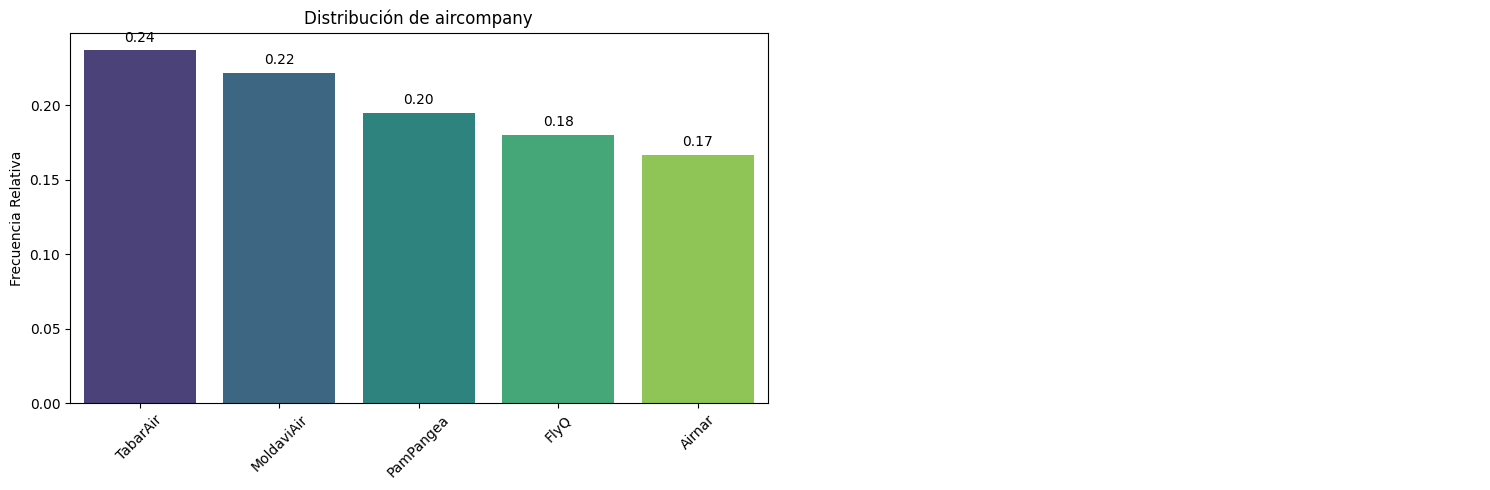

In [243]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")

# pintamos la distribución univariante en primer lugar:

pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


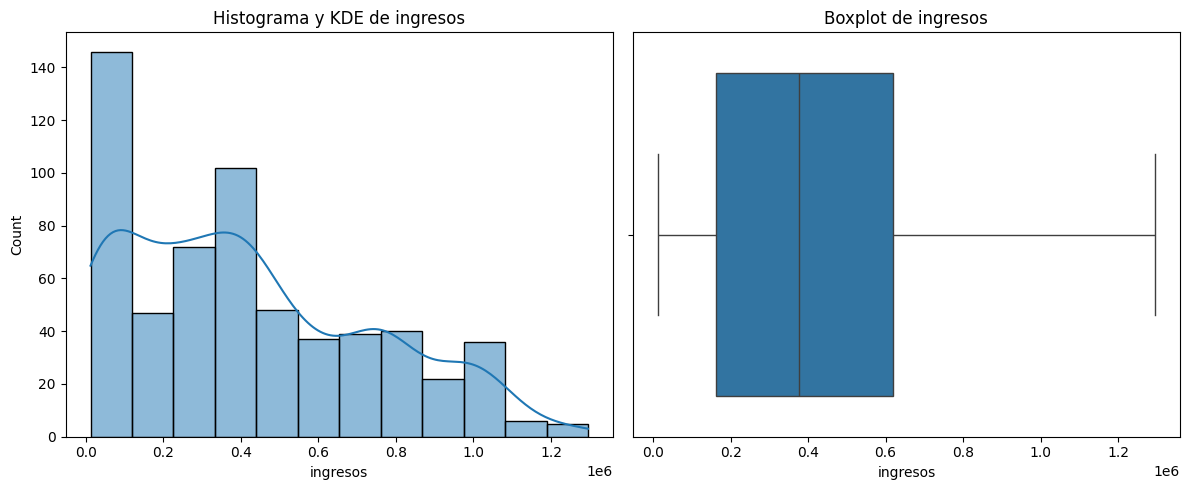

In [244]:
plot_combined_graphs(df_air_jun,["ingresos"])

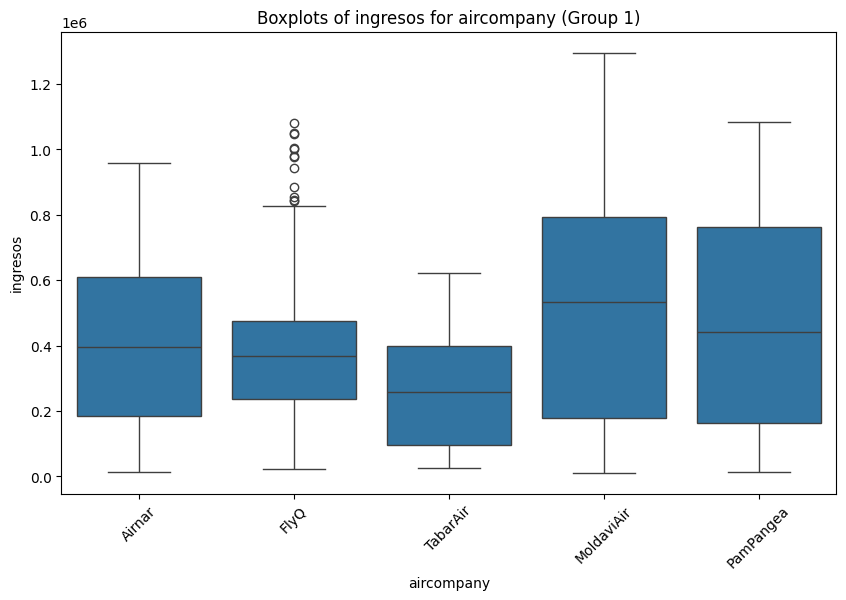

In [245]:
# las ponemos en comparativa:
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

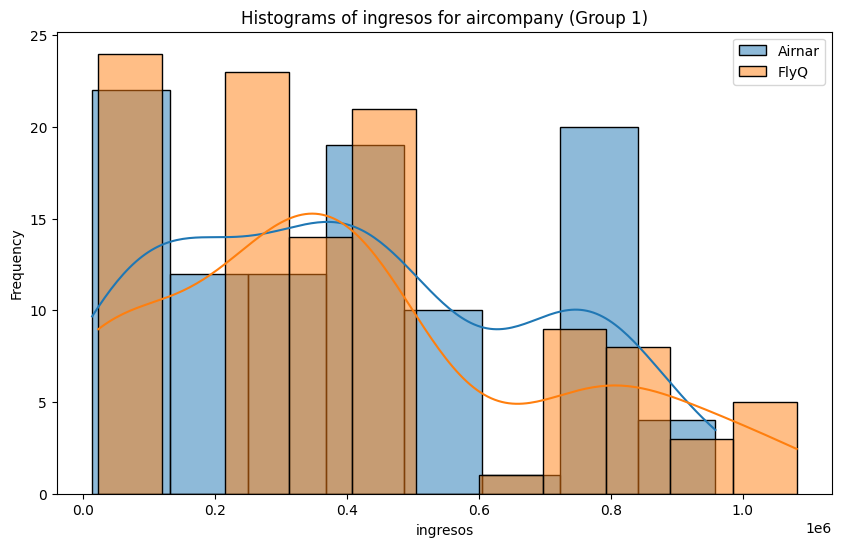

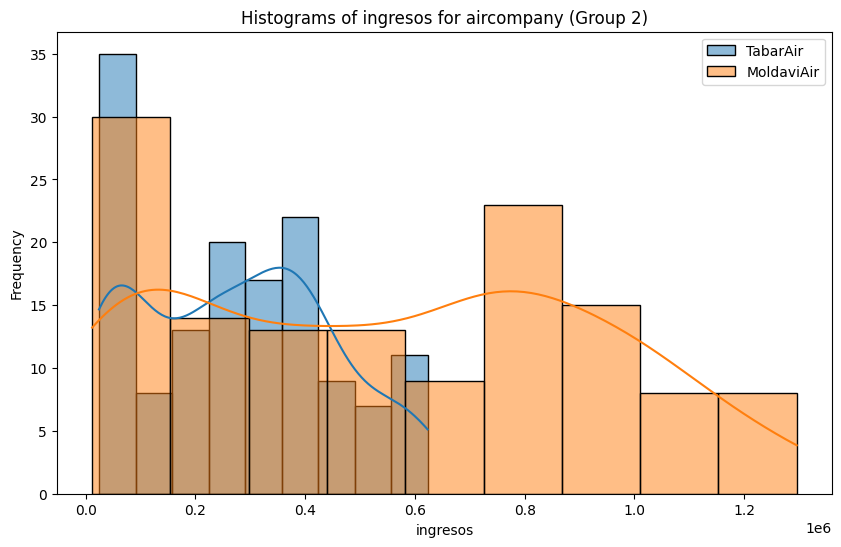

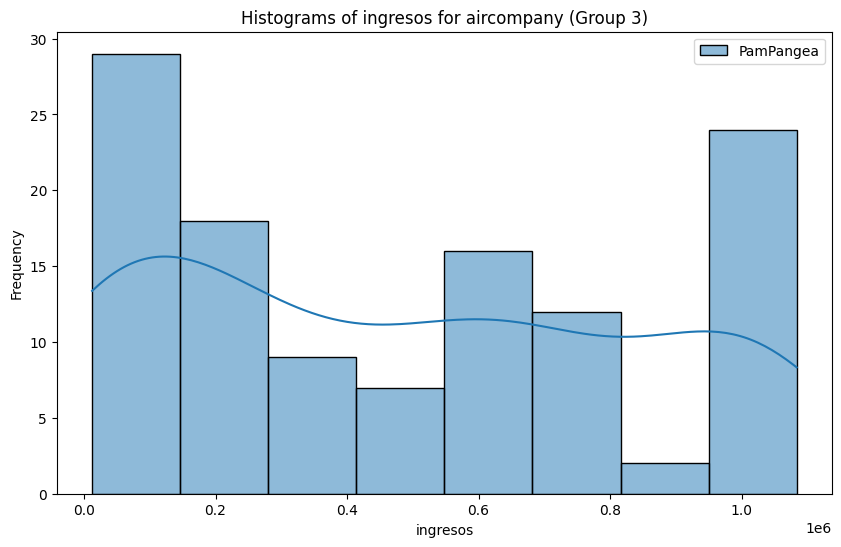

In [246]:
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 2)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

- En todas las compañisa hay una fuerte correlación ente ingresos y consumo.
- En todos los resultados también observamos dos rectas (una para los vuelos de corta distancia y otra para los de larga).
- Los vuelos cortos son más rentables
- Es curioso que TabarAir, siendo la compañía con mayor número de vuelos y destacando en vuelos cortos, no genere los ingresos esperados. 

In [247]:
# lo dividimos por compañías:

col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] 

Respuesta Airnar:


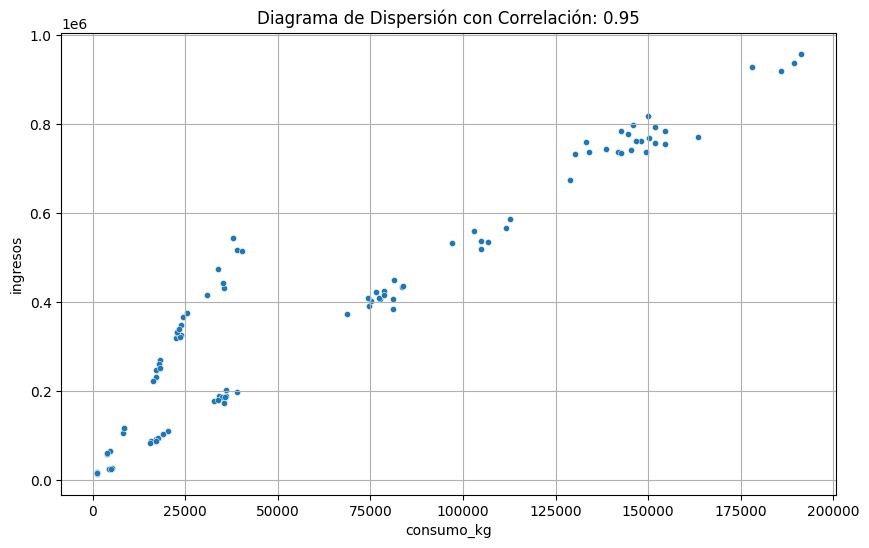

Respuesta FlyQ:


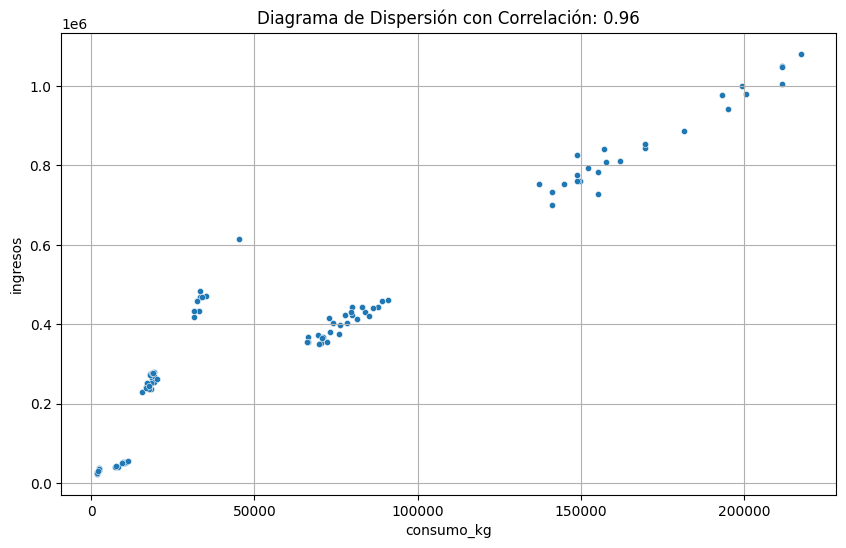

Respuesta TabarAir:


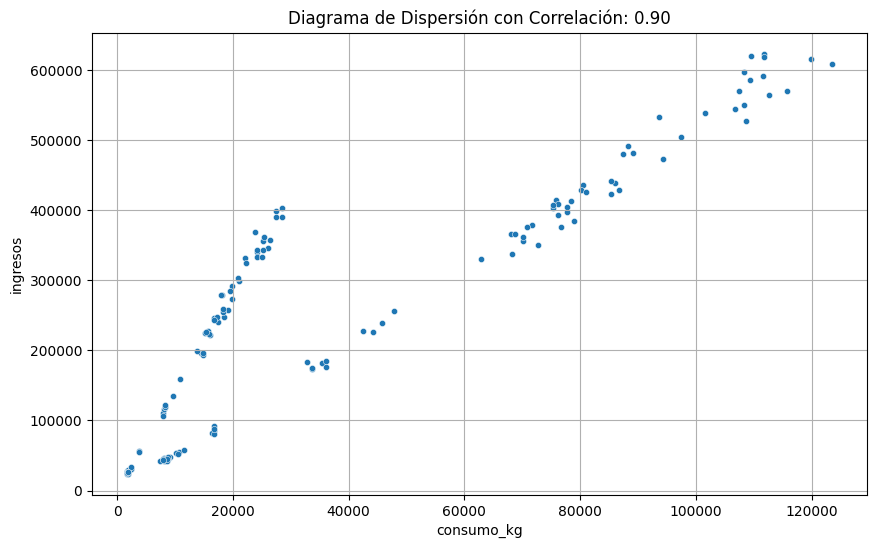

Respuesta MoldaviAir:


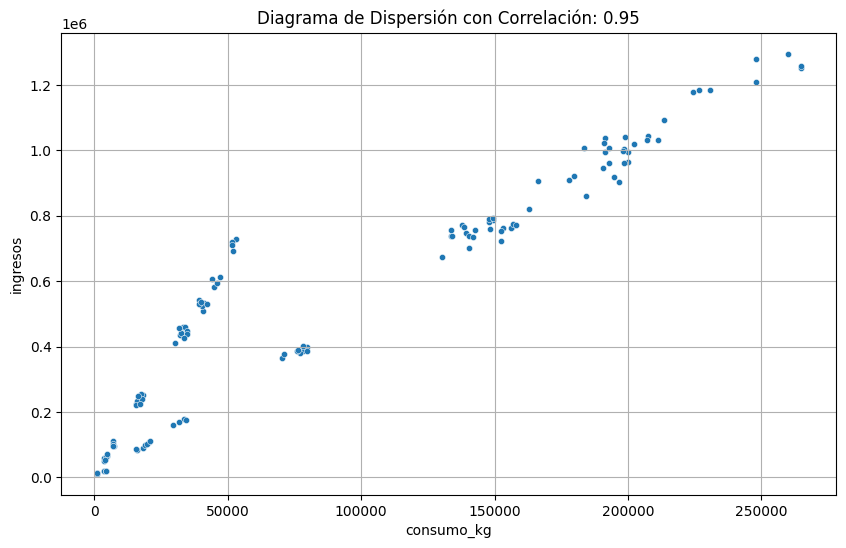

Respuesta PamPangea:


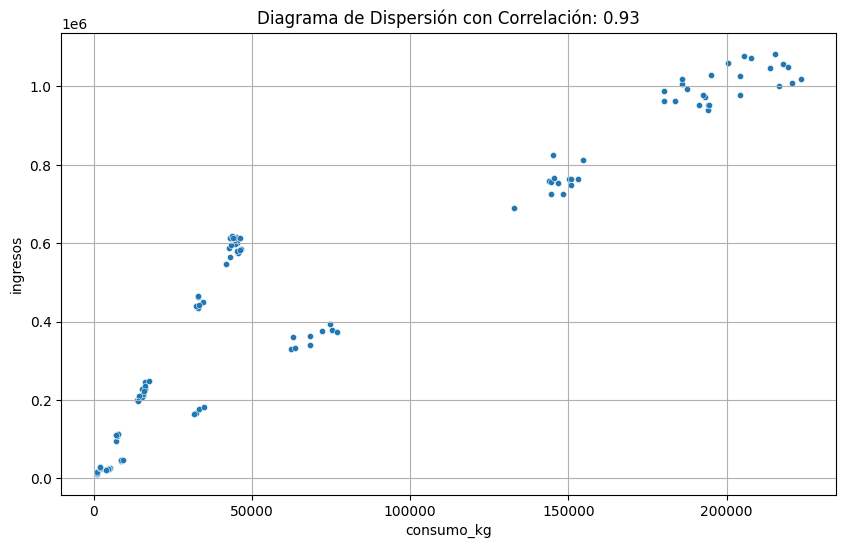

In [248]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.